# Objective of the task:

The aim of this task is to **perform descriptive analysis** on various datasets that have been scraped from different sources.

This task focuses on analyzing a dataset by understanding its structure, summarizing key statistics, and visualizing data trends and distributions. It helps in learning how to work with real-world, multi-domain data, prepare it for analysis, and extract meaningful insights using descriptive statistics and visualizations.


In [24]:
from google.colab import files

In [25]:
uploaded = files.upload()

Saving weather_final_report_20.csv to weather_final_report_20.csv


# Organize and Understand the data

In [26]:
import pandas as pd

In [27]:
df = pd.read_csv('weather_final_report_20.csv')

In [28]:
print(df)

              City           State Country  Latitude  Longitude  Timezone  \
0    Visakhapatnam  Andhra Pradesh   India   17.6900    83.2093     19800   
1       Vijayawada  Andhra Pradesh   India   16.5167    80.6167     19800   
2           Guntur  Andhra Pradesh   India   16.3000    80.4500     19800   
3          Nellore  Andhra Pradesh   India   14.4333    79.9667     19800   
4         Kakinada  Andhra Pradesh   India   16.9333    82.2167     19800   
..             ...             ...     ...       ...        ...       ...   
745      Shiquanhe           Ngari   Tibet   32.5167    80.0667     28800   
746            Gar           Ngari   Tibet   32.2000    79.9833     28800   
747          Rutog           Ngari   Tibet   33.4184    79.6392     28800   
748          Zanda           Ngari   Tibet   31.4813    79.8013     28800   
749           Geji           Ngari   Tibet   32.4167    81.0833     28800   

    Timestamp (OpenWeatherMap) Sunrise Sunset  Temperature  ...  \
0       

In [29]:
numerical_columns = [
    'Temperature', 'Feels Like (Day)', 'Feels Like (Night)', 'Pressure',
    'Humidity', 'Dew Point', 'UV Index', 'Cloud Cover', 'Visibility',
    'Wind Speed', 'Max Temperature', 'Min Temperature',
    'AQI', 'PM2.5', 'PM10', 'O3', 'CO'
]

## The average temperature, humidity, and wind speed for different Countries:

In [30]:
# Group the data by 'Region' and compute the average of 'Temperature', 'Humidity', and 'Wind Speed'
region_averages = df.groupby('Country').agg({
    'Temperature': 'mean',
    'Humidity': 'mean',
    'Wind Speed': 'mean'
}).reset_index()

# Display the computed averages
print(region_averages)

       Country  Temperature   Humidity  Wind Speed
0  Afghanistan    27.607692  24.641026    3.325641
1   Bangladesh    34.978571  52.607143    2.428571
2       Bhutan    25.067742  64.580645    2.574194
3        India    31.616117  55.355340    2.620058
4        Nepal    31.076786  60.303571    2.769643
5     Pakistan    34.187879  30.757576    2.572727
6        Tibet    16.175000  41.350000    3.005000


The above code **groups the df DataFrame by the 'Country' column and calculates the average for Temperature, Humidity, and Wind Speed in each Country**. The **.groupby()** function is used to create groups based on regions. The **.agg()** method applies the mean function to compute the averages for each column. Afterward, **.reset_index()** is called to turn the result back into a standard DataFrame. Finally, the resulting averages are displayed.

The table provides the average Temperature, Humidity, and Wind Speed for seven countries: Afghanistan, Bangladesh, Bhutan, India, Nepal, Pakistan, and Tibet.

*  Bangladesh and Pakistan show the highest average temperatures, while Tibet has the lowest.
* Bhutan and Nepal have the highest humidity, whereas Afghanistan and Pakistan show relatively low humidity levels.
* Wind speeds are generally similar across countries, with Afghanistan having the highest and Bangladesh the lowest.


## Time-series plots to observe weather trends

In [1]:
from google.colab import files
uploaded = files.upload()

Saving date_city_temperature.csv to date_city_temperature.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
df_D = pd.read_csv('date_city_temperature.csv')

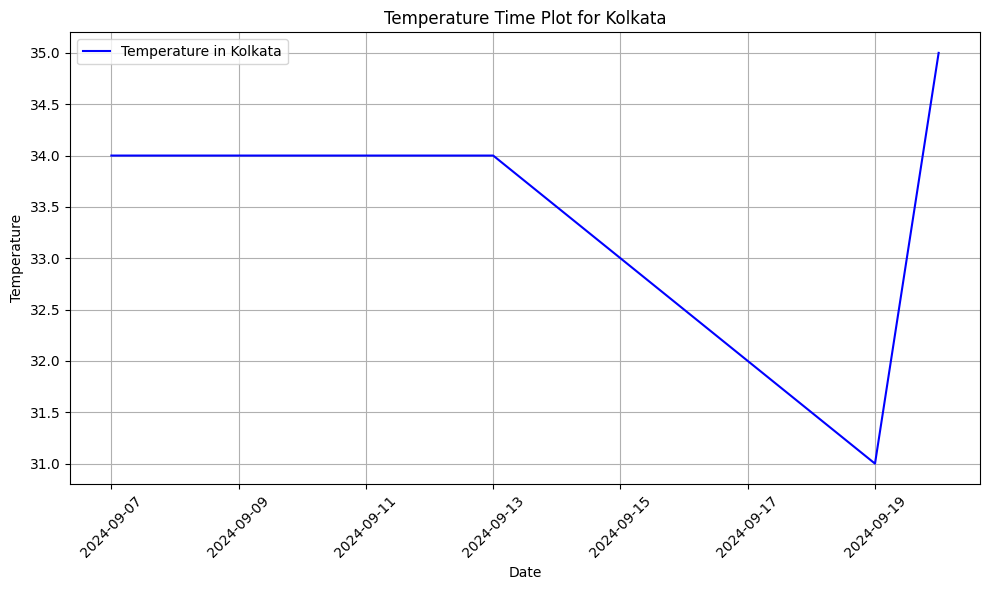

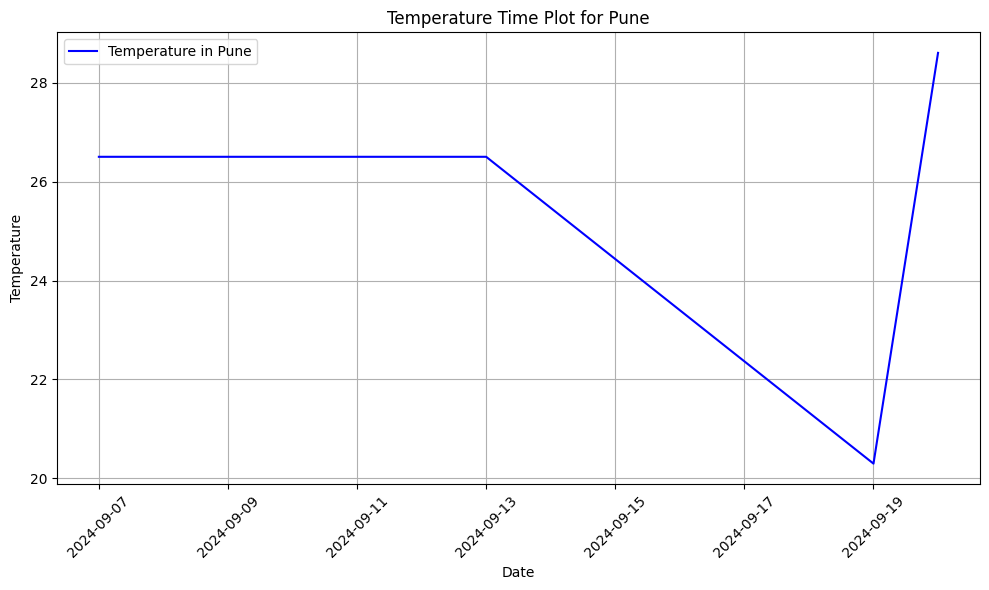

In [12]:
# Step 2: Preprocess the data
df_D['Date'] = pd.to_datetime(df_D['Date'])
df_D.set_index('Date', inplace=True)

# Define the specific cities of interest
cities_of_interest = ['Kolkata', 'Pune']

# Filter the data for only the selected cities
df_filtered = df_D[df_D['City'].isin(cities_of_interest)]

# Step 3: Plot the temperature data for each city
for city in cities_of_interest:
    city_data = df_filtered[df_filtered['City'] == city]['Temperature']

    # Create the time plot
    plt.figure(figsize=(10, 6))
    plt.plot(city_data.index, city_data, label=f'Temperature in {city}', color='blue')
    plt.title(f'Temperature Time Plot for {city}')
    plt.xlabel('Date')
    plt.ylabel('Temperature')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


The **First temperature time plot for Kolkata spans from September 7 to September 19, 2024.** The temperature remains steady at around 34°C until September 13. There is then a sharp decline, reaching a low of 31°C around September 17. The temperature quickly rebounds, spiking back to 35°C by September 19. The overall trend indicates **a sharp fluctuation in temperature during this period**.




The Second plot represents the **temperature trend for Pune** from September 7 to September 19, 2024.

The temperature remains stable around 26°C for the first few days until approximately September 13. Around mid-September, the temperature experiences a sharp decline, dropping close to 21°C by September 17.
The lowest point is observed around September 19, with the temperature nearing 20°C. After the sharp decline, the temperature spikes rapidly, rising back to 28°C by September 19.

The overall trend shows **a significant temperature fluctuation within this period, with both a large drop and recovery**.

## Correlations between weather variables and air quality variables:

In [31]:
numerical_data = df[numerical_columns]
correlation_matrix = numerical_data.corr()

In [32]:
correlation_matrix = numerical_data.corr()

In [33]:
print(correlation_matrix)

                    Temperature  Feels Like (Day)  Feels Like (Night)  \
Temperature            1.000000          0.935411            0.935411   
Feels Like (Day)       0.935411          1.000000            1.000000   
Feels Like (Night)     0.935411          1.000000            1.000000   
Pressure               0.773474          0.786194            0.786194   
Humidity              -0.316003         -0.095156           -0.095156   
Dew Point              0.564170          0.713175            0.713175   
UV Index               0.374836          0.304031            0.304031   
Cloud Cover           -0.298361         -0.287182           -0.287182   
Visibility             0.384226          0.329120            0.329120   
Wind Speed            -0.093995         -0.128134           -0.128134   
Max Temperature        0.889702          0.843989            0.843989   
Min Temperature        0.822818          0.849505            0.849505   
AQI                    0.462119          0.426196  

 ***Correlations between weather variables and air quality variables:***

The correlation matrix provided shows how different weather and air quality variables relate to each other, with values ranging from -1 to 1.

 **Pressure:**

* ***Positive correlations:*** With temperature (0.90) and dew point (0.79), indicating that higher pressure is associated with warmer temperatures and more moisture in the air.With AQI (0.42) and PM2.5 (0.34), meaning that higher pressure can be linked to worse air quality (possibly due to stagnant air).

* ***Negative correlation:*** With cloud cover (-0.23), meaning clearer skies are more common during high-pressure conditions.

**Humidity:**

* ***Negative correlations:*** With temperature (-0.03) and ozone (O₃) (-0.56), suggesting humidity rises slightly as temperature decreases and that higher humidity lowers ozone levels. With wind speed (-0.31), meaning less wind is associated with higher humidity.
* ***Positive correlations:*** With dew point (0.60), as humid air has a higher dew point (more moisture).

**Dew Point:**

* ***Positive correlations:*** With temperature (0.77), feels like temperature (~0.80), and pressure (0.79), indicating higher dew points occur with warmer temperatures and higher pressure.
With AQI (0.34) and PM2.5 (0.32), suggesting that higher dew points (more moisture) may correlate with worse air quality.

**Cloud Cover:**

* ***Negative correlations:*** With temperature (-0.25), pressure (-0.23), and dew point (-0.21), meaning more cloud cover tends to occur during cooler, lower-pressure, and less humid conditions.

**Visibility:**

* ***Positive correlations:*** With temperature (0.13), pressure (0.08), and AQI (0.12), indicating that clearer days are associated with better visibility.
* ***Negative correlations:*** With humidity (-0.14), meaning higher humidity tends to reduce visibility.

**Wind Speed:**

* ***Positive correlation:*** With ozone (O₃) (0.36), as higher wind speeds can lead to more dispersion of pollutants, reducing air stagnation.
* ***Negative correlation:*** With humidity (-0.31) and AQI (-0.05), indicating higher wind speeds are associated with less humidity and slightly better air quality.

**AQI, PM2.5, PM10, and CO:**

* These air quality measures are strongly positively correlated with each other (e.g., PM2.5 & PM10 (0.98)), meaning high levels of one pollutant tend to correlate with high levels of others.
CO has a moderate positive correlation with AQI (0.62) and particulate matter, indicating that carbon monoxide levels rise with worse overall air quality.

# Data Cleaning and Preparation

## Handling missing value:

  **The following section checks whether the 'Wind Gust' column in the DataFrame df contains only null values.** If all values in the column are null, it removes the 'Wind Gust' column from the DataFrame. The code also prints a confirmation message indicating that the column has been successfully dropped. This operation helps in cleaning the dataset by eliminating unnecessary columns that do not provide useful information for analysis.
The **isnull().all()** function checks if all values in a specified column are null (i.e., missing) and returns True if every value is null; otherwise, it returns False.

In [34]:
if df['Wind Gust'].isnull().all():
    df = df.drop(columns=['Wind Gust'])
    print("'Wind Gust' column has been dropped.")

'Wind Gust' column has been dropped.


In [35]:
print(df)

              City           State Country  Latitude  Longitude  Timezone  \
0    Visakhapatnam  Andhra Pradesh   India   17.6900    83.2093     19800   
1       Vijayawada  Andhra Pradesh   India   16.5167    80.6167     19800   
2           Guntur  Andhra Pradesh   India   16.3000    80.4500     19800   
3          Nellore  Andhra Pradesh   India   14.4333    79.9667     19800   
4         Kakinada  Andhra Pradesh   India   16.9333    82.2167     19800   
..             ...             ...     ...       ...        ...       ...   
745      Shiquanhe           Ngari   Tibet   32.5167    80.0667     28800   
746            Gar           Ngari   Tibet   32.2000    79.9833     28800   
747          Rutog           Ngari   Tibet   33.4184    79.6392     28800   
748          Zanda           Ngari   Tibet   31.4813    79.8013     28800   
749           Geji           Ngari   Tibet   32.4167    81.0833     28800   

    Timestamp (OpenWeatherMap) Sunrise Sunset  Temperature  ...  Wind Speed

## Transforming the Data:

This code utilizes the StandardScaler from the sklearn.preprocessing module to apply **Z-score normalization to the numerical columns of the DataFrame df**. It initializes the scaler, transforms the specified numerical columns to have a mean of 0 and a standard deviation of 1, and updates the DataFrame with these normalized values.**bold text**

In [36]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply Z-score normalization to the numerical columns
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

print("Z-score normalization applied to numerical columns:")
print(df.head())

Z-score normalization applied to numerical columns:
            City           State Country  Latitude  Longitude  Timezone  \
0  Visakhapatnam  Andhra Pradesh   India   17.6900    83.2093     19800   
1     Vijayawada  Andhra Pradesh   India   16.5167    80.6167     19800   
2         Guntur  Andhra Pradesh   India   16.3000    80.4500     19800   
3        Nellore  Andhra Pradesh   India   14.4333    79.9667     19800   
4       Kakinada  Andhra Pradesh   India   16.9333    82.2167     19800   

  Timestamp (OpenWeatherMap) Sunrise Sunset  Temperature  ...  Wind Speed  \
0        2024-09-20 08:50:26   00:15  12:25     0.266617  ...   -0.267212   
1        2024-09-20 08:50:26   00:25  12:34     0.679231  ...    1.841337   
2        2024-09-20 08:50:26   00:25  12:34     0.558886  ...    0.400990   
3        2024-09-20 08:50:27   00:30  12:39     1.023076  ...    2.331352   
4        2024-09-20 08:50:27   00:21  12:30     0.593270  ...    0.623724   

   Wind Direction  Weather Descrip

## One-hot encoding:

The **unique()** function is used to retrieve all unique values from the 'Weather Description' column, and these are printed. The nunique() function is applied to count the number of distinct weather descriptions, and this count is printed. The value_counts() function calculates the frequency of each unique weather description, displaying how often each category appears in the column.

In [37]:
# Apply One-Hot Encoding on 'Weather Description'
df_encoded = pd.get_dummies(df, columns=['Weather Description'], prefix='Weather', drop_first=True)

# Convert only the one-hot encoded columns to integers
for col in df_encoded.columns:
    if 'Weather_' in col:  # Check if the column is one of the new encoded columns
        df_encoded[col] = df_encoded[col].astype(int)

# Display the resulting dataframe
print(df_encoded.head())

            City           State Country  Latitude  Longitude  Timezone  \
0  Visakhapatnam  Andhra Pradesh   India   17.6900    83.2093     19800   
1     Vijayawada  Andhra Pradesh   India   16.5167    80.6167     19800   
2         Guntur  Andhra Pradesh   India   16.3000    80.4500     19800   
3        Nellore  Andhra Pradesh   India   14.4333    79.9667     19800   
4       Kakinada  Andhra Pradesh   India   16.9333    82.2167     19800   

  Timestamp (OpenWeatherMap) Sunrise Sunset  Temperature  ...         CO  \
0        2024-09-20 08:50:26   00:15  12:25     0.266617  ...  15.051667   
1        2024-09-20 08:50:26   00:25  12:34     0.679231  ...  -0.487349   
2        2024-09-20 08:50:26   00:25  12:34     0.558886  ...  -0.334342   
3        2024-09-20 08:50:27   00:30  12:39     1.023076  ...  -0.708403   
4        2024-09-20 08:50:27   00:21  12:30     0.593270  ...  -0.062353   

   Weather_Clear sky  Weather_Drizzle  Weather_Few clouds  Weather_Haze  \
0                

# Descriptive Statistical Analysis



## Central Tendency & Dispersion Measures:

In [38]:
descriptive_stats = df[numerical_columns].describe()

In [39]:
print(descriptive_stats)

        Temperature  Feels Like (Day)  Feels Like (Night)      Pressure  \
count  7.500000e+02      7.500000e+02        7.500000e+02  7.500000e+02   
mean   7.579123e-16     -1.515825e-16       -1.515825e-16  7.200166e-16   
std    1.000667e+00      1.000667e+00        1.000667e+00  1.000667e+00   
min   -3.962675e+00     -3.337822e+00       -3.337822e+00 -4.365978e+00   
25%   -3.523035e-01     -4.457773e-01       -4.457773e-01 -1.070246e-01   
50%    2.150406e-01      1.703540e-01        1.703540e-01  4.066180e-01   
75%    6.792313e-01      6.733183e-01        6.733183e-01  6.206358e-01   
max    2.140572e+00      2.559434e+00        2.559434e+00  9.202606e-01   

           Humidity     Dew Point      UV Index   Cloud Cover    Visibility  \
count  7.500000e+02  7.500000e+02  7.500000e+02  7.500000e+02  7.500000e+02   
mean   8.526513e-17 -3.789561e-17 -1.705303e-16  5.684342e-17 -4.168517e-16   
std    1.000667e+00  1.000667e+00  1.000667e+00  1.000667e+00  1.000667e+00   
min   -2

The above table shows **descriptive statistics with various weather and air quality parameters, normalized with a mean close to zero and a standard deviation near 1**.
* The Temperature, Feels Like (Day), and Feels Like (Night) have mean values close to zero, with the minimum temperatures at around -3.96°C and a maximum of 2.14°C.

* The Pressure ranges from -4.37 to 0.92 units, with a mean near zero, and the Humidity spans from -2.70 to 2.72 units, suggesting diverse humidity levels.
* Dew Point ranges from -5.37 to 1.47, while UV Index and Cloud Cover show a wide spread from negative to positive values.

* The Visibility has a minimum of -7.94 and a maximum of 0.18 units, indicating poor visibility in some instances.
* Wind Speed ranges from -1.97 to 4.93, with the mean near zero, reflecting a mix of calm and windy conditions.
* For air quality, AQI varies from -1.49 to 1.86, PM2.5 and PM10 range from negative values to around 6.37 and 6.07, respectively, while O3 shows high values up to 5.05. Finally, CO concentrations range from -1.31 to 15.05, with significant variance in the data.

## Frequency Distributions:

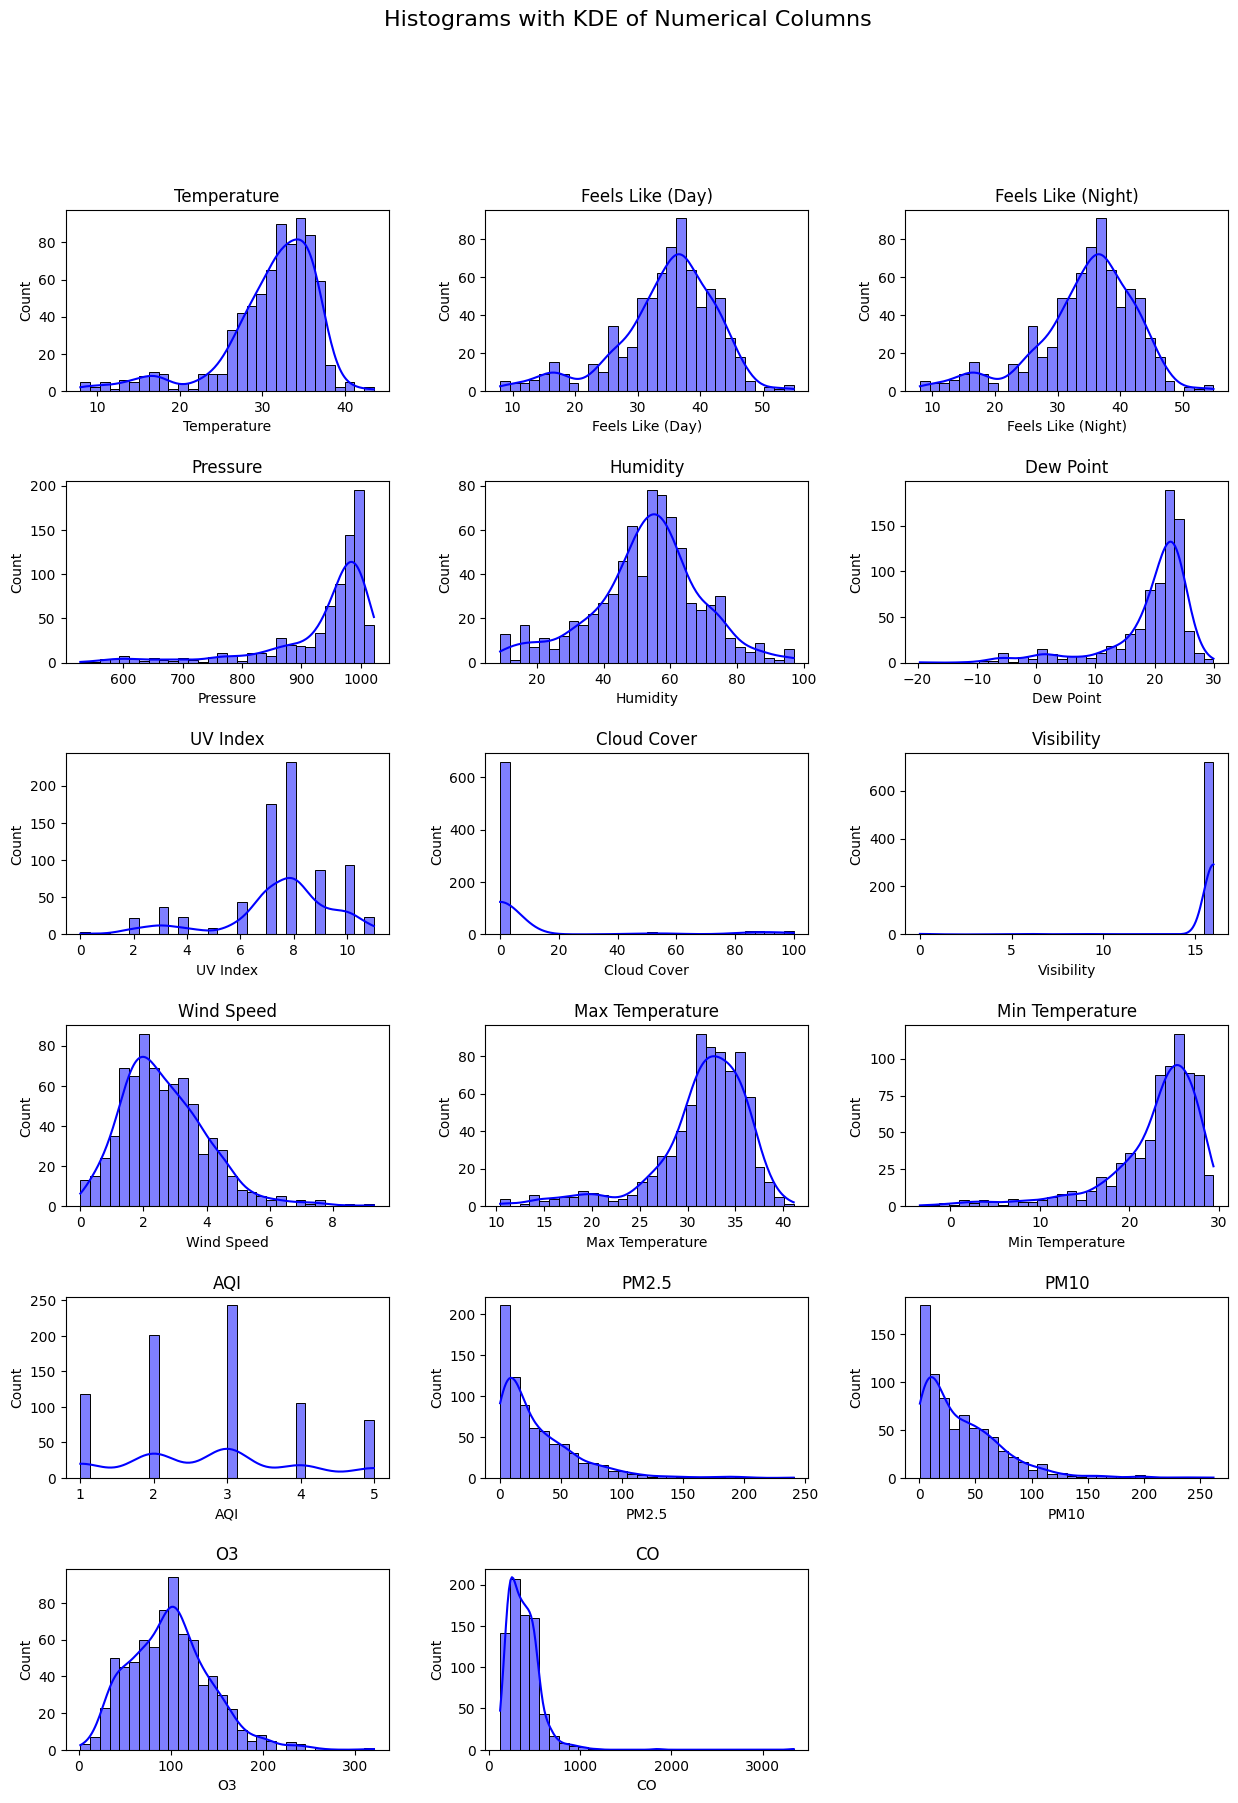

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, axes = plt.subplots(len(numerical_data.columns) // 3 + 1, 3, figsize=(15, 20))
axes = axes.flatten()
fig.suptitle('Histograms with KDE of Numerical Columns', fontsize=16)
plt.subplots_adjust(hspace=0.5, wspace=0.3)
for i, column in enumerate(numerical_data.columns):
    sns.histplot(numerical_data[column], bins=30, kde=True, color='blue', edgecolor='black', ax=axes[i])
    axes[i].set_title(column)

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.show()

The above section shows histograms with Kernel Density Estimation (KDE) plots of several numerical columns, likely from a weather dataset. The KDE line smoothens the distribution, giving a visual representation of the data distribution for each variable:

*  **Temperature:** Skewed right, peaking around 30°C.
*  **Feels Like (Day):** Similar to temperature, peaking between 35°C-40°C.
*  **Feels Like (Night):** Lower temperatures than the day, peaking around 30°C.
*  **Pressure:** Mostly concentrated above 950 hPa.
*  **Humidity:** Follows a near-normal distribution with a peak around 60%.
*  **Dew Point:** Highly concentrated near 20°C-30°C.
*  **UV Index:** Bimodal peaks at 5 and 9.
*  **Cloud Cover:** Skewed toward 0%, suggesting frequent clear skies.
*  **Visibility:** Mostly concentrated near maximum visibility (around 15 km).
*  **Wind Speed:** Peaks around 2-3 m/s.
*  Max Temperature: Similar distribution to general temperature, peaking around 35°C.
*  **Min Temperature:** Peaks near 25°C.
*  **AQI:** Multimodal distribution with notable peaks across categories.
*  **PM2.5 and PM10:** Skewed distributions with concentration near lower values.
*  **O3:**Slightly skewed, peak around 100 µg/m³.
*  **CO:**Highly skewed with most counts below 1000 µg/m³.

The overall distributions highlight both skewed and normal-like behavior across variables.


## Identify Outliers:

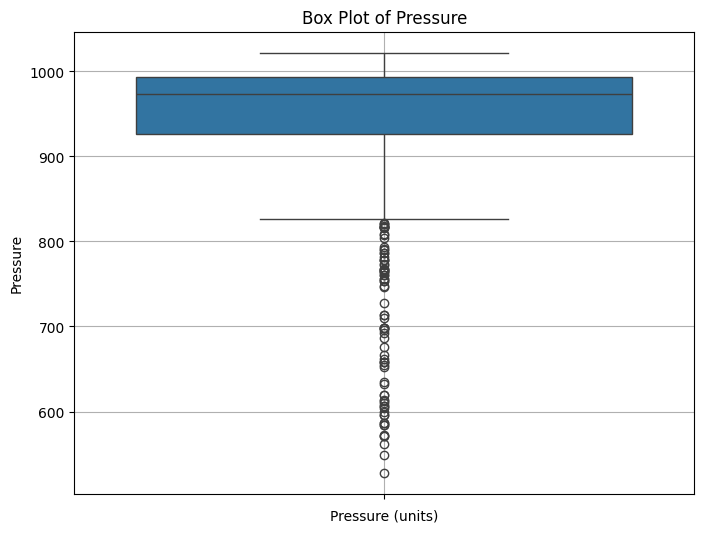

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.boxplot(data=numerical_data['Pressure'])
plt.title('Box Plot of Pressure')
plt.xlabel('Pressure (units)')
plt.grid(True)
plt.show()

The box plot displays **the distribution of Pressure values**. The majority of the data is concentrated between 900 and 1000 units, as indicated by the thick box. The median is close to the upper part of the box, suggesting a slight skew towards lower pressures. **There are several outliers below the lower whisker, with pressure values ranging between 600 and 800 units**. The whiskers extend to the minimum and maximum non-outlier values, capturing the spread of the data. The plot highlights the presence of a large number of low-pressure outliers.

# Visualization

## Histograms:

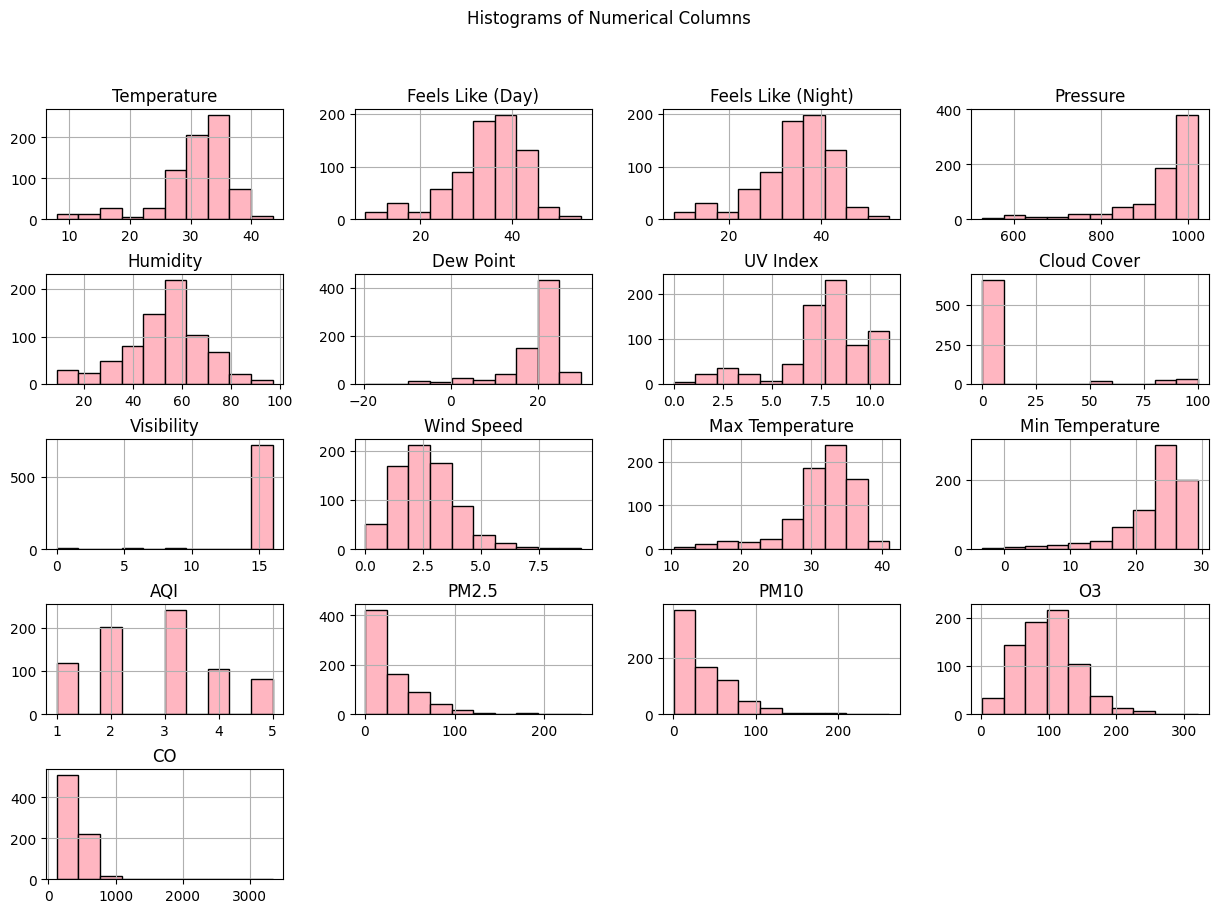

In [41]:
import matplotlib.pyplot as plt

# Plot histograms for each numerical column
numerical_data.hist(figsize=(15, 10), color='lightpink',edgecolor='black')
plt.suptitle('Histograms of Numerical Columns')
plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.show()


## Bar Charts:

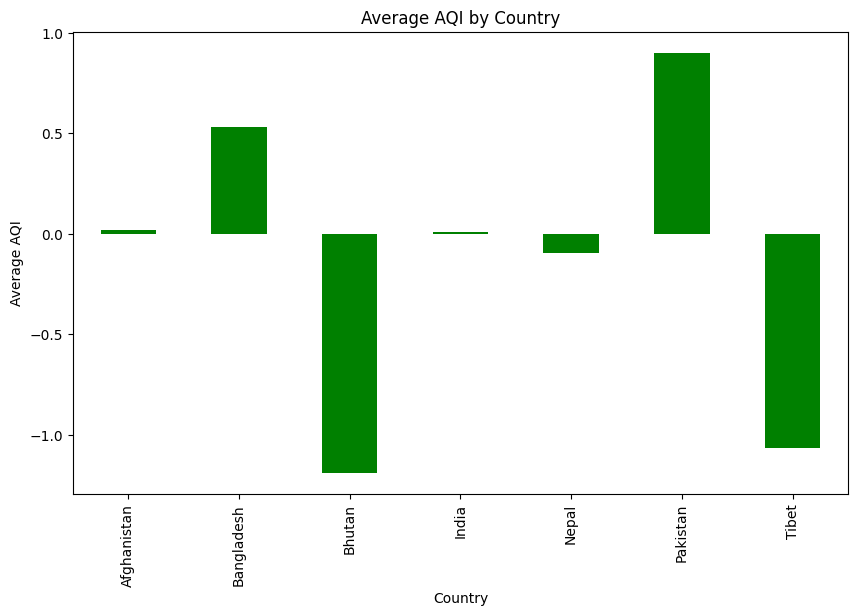

In [42]:
# Bar plot of average AQI across all cities
mean_aqi = df.groupby('Country')['AQI'].mean()
mean_aqi.plot(kind='bar', figsize=(10, 6), color='green')
plt.title('Average AQI by Country')
plt.ylabel('Average AQI')
plt.show()

The bar chart titled **"Average AQI by Country"** displays the average Air Quality Index (AQI) for seven regions: Afghanistan, Bangladesh, Bhutan, India, Nepal, Pakistan, and Tibet.

The y-axis ranges from -1 to 1, indicating AQI values.

  * Afghanistan shows a near-zero AQI.
  * Bangladesh has a positive AQI, suggesting better air quality.
  * Bhutan and India both display negative AQI values, indicating poorer air quality.
  * Nepal has a low positive AQI.
  * Pakistan records the highest positive AQI, signaling significantly poor air quality.
  * Tibet exhibits the best air quality among the countries listed, with a very low positive AQI.

The green bars provide a clear visual comparison of air quality across these regions.


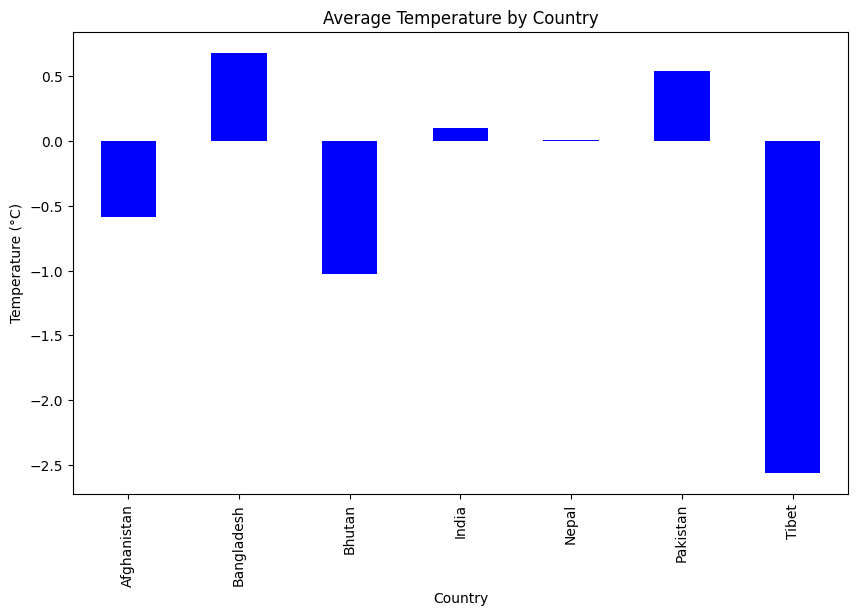

In [43]:
# Bar plot for average Temperature in each city
mean_temp = df.groupby('Country')['Temperature'].mean()
mean_temp.plot(kind='bar', figsize=(10, 6), color='blue')
plt.title('Average Temperature by Country')
plt.ylabel('Temperature (°C)')
plt.show()

The bar chart  displays the **"Average Temperature by Country."**

* X-axis (Country): Represents the countries listed, including Afghanistan ,
Bangladesh, Bhutan, India, Nepal, Pakistan, and Tibet.

* Y-axis (Temperature in °C): Shows the temperature range, with negative and positive values, indicating average temperatures for each country.
* Tibet stands out with the coldest average temperature, significantly lower than the rest, likely due to its high altitude and geographic location.

* Bangladesh and Pakistan show the warmest average temperatures, suggesting more tropical or temperate climates.

* India's average temperature is slightly above 0°C, close to neutral, indicating a mix of cold and temperate regions.

* Afghanistan, Bhutan have average temperatures below zero, indicating colder climates but not as extreme as Tibet.

The bar blue color indicates **the average temperatures for each country**, where the height and direction (above/below 0°C) of the bar represent the relative warmth or coldness.

This chart is effective in giving a quick comparative view of the climate diversity in the South Asia-Tibet region, showing a range from warm to quite cold climates.

## Line plot:

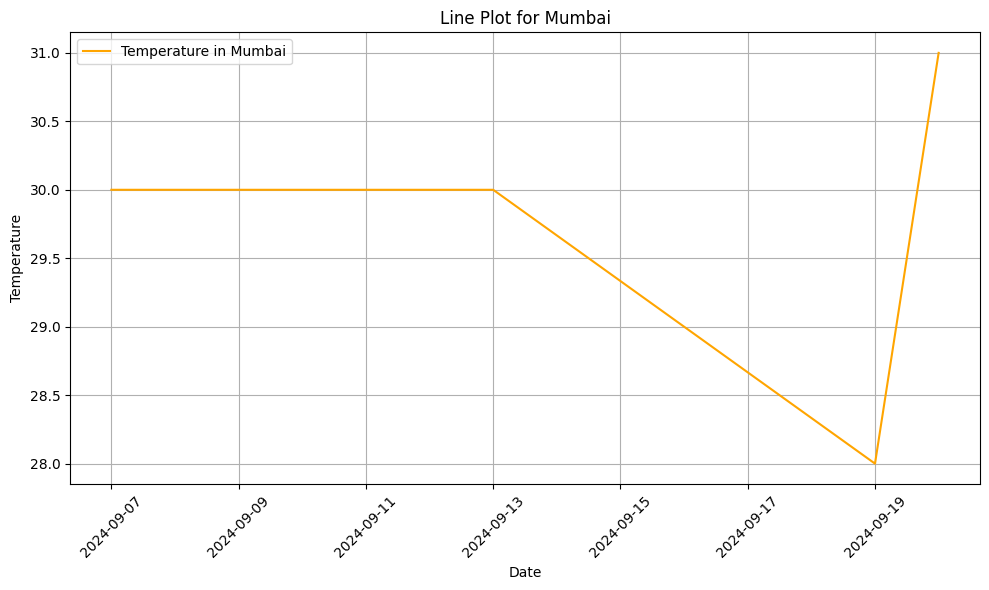

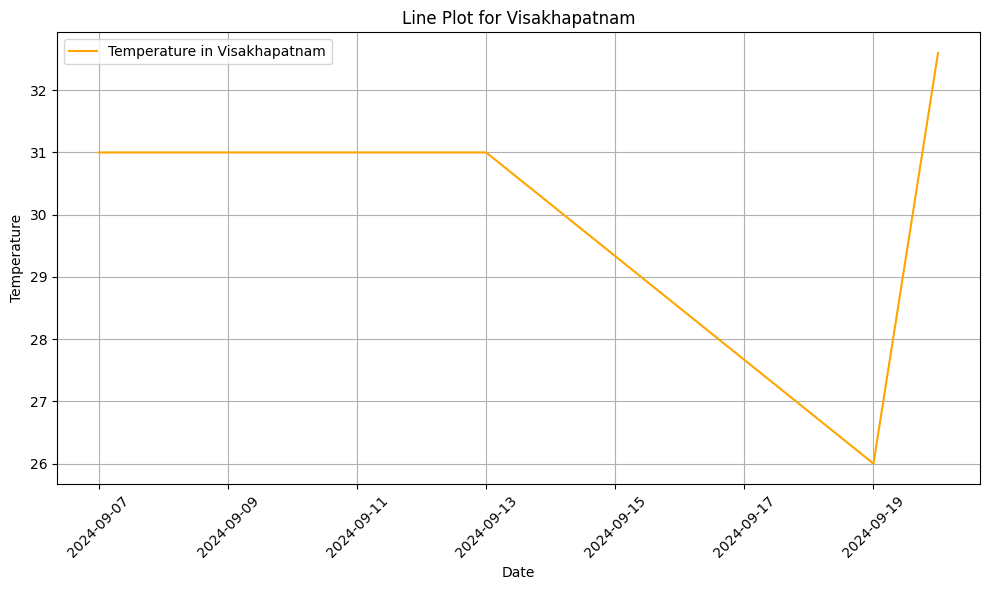

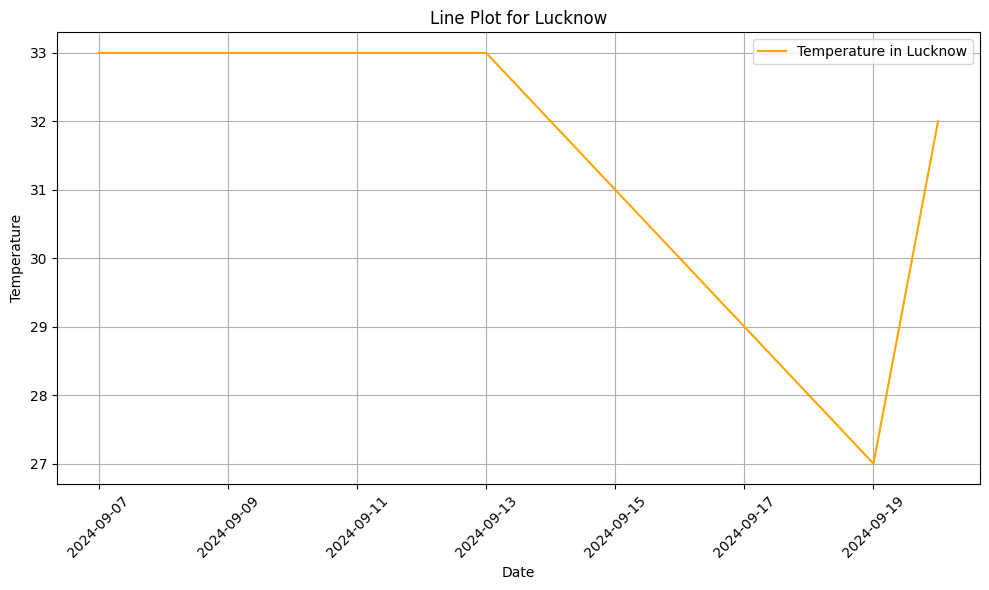

In [20]:
# Define the specific cities of interest
cities_of_interest = [ 'Mumbai', 'Visakhapatnam', 'Lucknow']

# Filter the data for only the selected cities
df_filtered = df_D[df_D['City'].isin(cities_of_interest)]

# Plot the temperature data for each city
for city in cities_of_interest:
    city_data = df_filtered[df_filtered['City'] == city]['Temperature']

    # Create the time plot
    plt.figure(figsize=(10, 6))
    plt.plot(city_data.index, city_data, label=f'Temperature in {city}', color='orange')
    plt.title(f'Line Plot for {city}')
    plt.xlabel('Date')
    plt.ylabel('Temperature')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


The First Plot represents a line plot for **the temperature trend in Mumbai over time**, with dates on the x-axis and temperatures on the y-axis. The temperature remains constant at 30°C for a few days, then drops around September 13-17, reaching a low of about 28°C. The temperature then sharply increases to around 31°C by September 19. The graph clearly shows the variations in temperature over this period, with notable changes in the middle and end.

The Second line plot shows **the temperature trend in Visakhapatnam over a time period**. The temperature starts around 31°C and remains steady for several days. Around September 13-17, there is a significant drop in temperature to about 26°C, followed by a sharp increase back to approximately 32°C by September 19. The plot effectively visualizes the sudden fluctuations in temperature towards the middle and end of the observed period.

The Third line plot represents **the temperature trend in Lucknow over several days in September 2024**. The plot starts with a constant temperature of 33°C from the 7th to the 12th. There is a sharp decline in temperature starting on the 13th, dropping significantly to 27°C by the 17th. The temperature then rises sharply back to 32°C on the 19th.

## Scatter Plot:

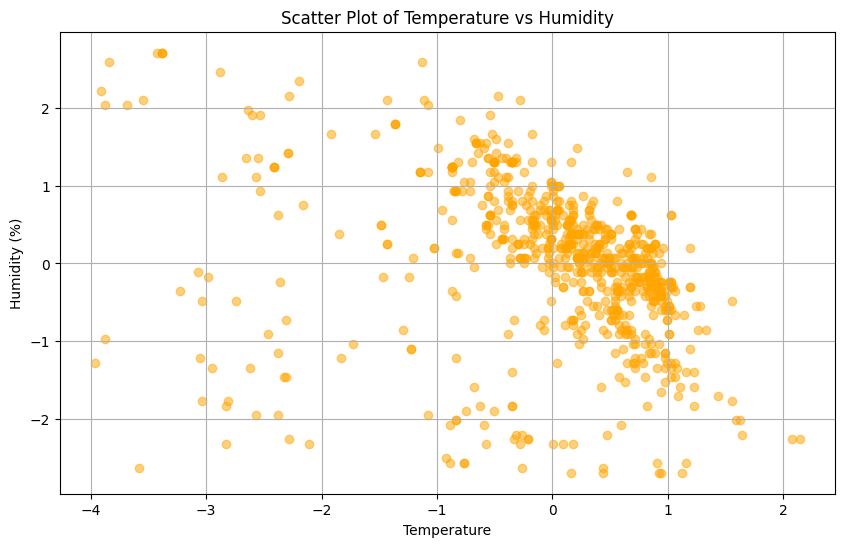

In [44]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(df['Temperature'], df['Humidity'], alpha=0.5, color='orange')
plt.title('Scatter Plot of Temperature vs Humidity')
plt.xlabel('Temperature')
plt.ylabel('Humidity (%)')
plt.grid(True)
plt.show()


The scatter plot shows **the relationship between Temperature (x-axis) and Humidity (y-axis)**. The data points are spread out with an orange color. There is a noticeable negative correlation: as temperature increases, humidity generally decreases. Most data points are concentrated around the center, showing clustering in that region, while some points are more dispersed across the outer areas.

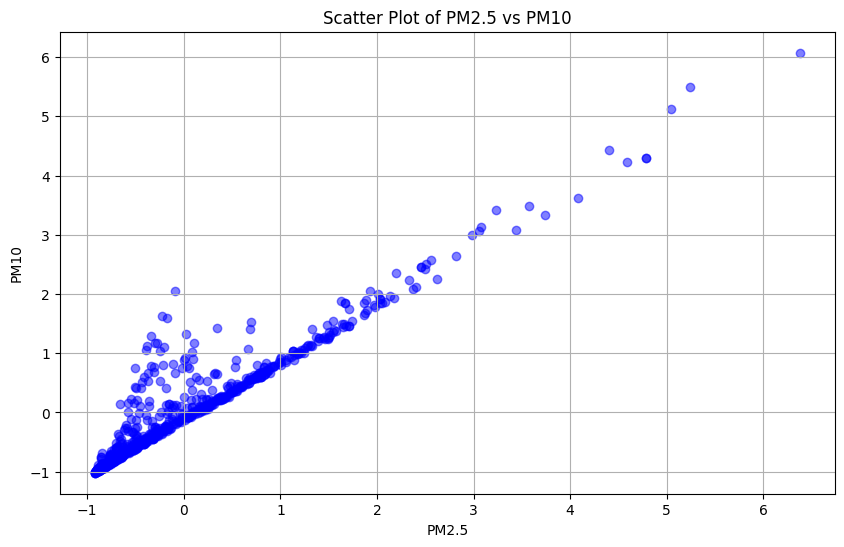

In [45]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(df['PM2.5'], df['PM10'], alpha=0.5, color='blue')
plt.title('Scatter Plot of PM2.5 vs PM10')
plt.xlabel('PM2.5')
plt.ylabel('PM10')
plt.grid(True)
plt.show()

The scatter plot illustrates the **relationship between PM2.5 (x-axis) and PM10 (y-axis)**. There is a strong positive correlation, as higher PM2.5 values generally correspond to higher PM10 values. The data points form a linear pattern extending from the lower-left corner (around -1, -1) to the upper-right (around 6, 6). The clustering of points near the origin indicates higher density in the lower PM range, while fewer points are seen at higher values. The blue color highlights the linear association, suggesting a direct relationship between PM2.5 and PM10 levels.

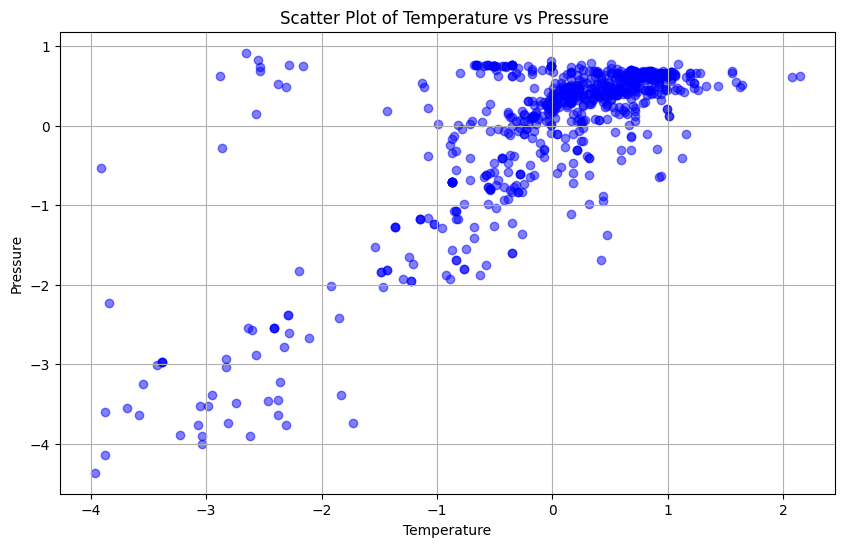

In [46]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(df['Temperature'], df['Pressure'], alpha=0.5, color='blue')
plt.title('Scatter Plot of Temperature vs Pressure ')
plt.xlabel('Temperature')
plt.ylabel('Pressure')
plt.grid(True)
plt.show()

The scatter plot shows **the relationship between Temperature (x-axis) and Pressure (y-axis)**. There is a notable clustering of data points at higher temperatures (between 0 and 1 on the x-axis) and pressures (between -1 and 1 on the y-axis). However, **as temperature decreases, the points are more spread out, with lower temperatures (around -4) corresponding to lower pressures (around -4)**. The overall trend seems to suggest a positive correlation between temperature and pressure, with denser clustering at higher values. The blue color highlights the spread and concentration of points.